# K-Nearest Neighbors (K-NN)

In [1]:
# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]
head(dataset)

Age EstimatedSalary Purchased
1 19  19000           0        
2 35  20000           0        
3 26  43000           0        
4 27  57000           0        
5 19  76000           0        
6 27  58000           0

# Encoding the target feature as factor

In [2]:
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

# Splitting the dataset into the Training set and Test set

In [3]:
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"

In [4]:
head(training_set)

Age EstimatedSalary Purchased
1  19   19000          0        
3  26   43000          0        
6  27   58000          0        
7  27   84000          0        
8  32  150000          1        
10 35   65000          0

# Feature Scaling

In [5]:
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [6]:
head(training_set)

Age        EstimatedSalary Purchased
1  -1.7655475 -1.4733414      0        
3  -1.0962966 -0.7883761      0        
6  -1.0006894 -0.3602727      0        
7  -1.0006894  0.3817730      0        
8  -0.5226531  2.2654277      1        
10 -0.2358313 -0.1604912      0

# Fitting K-NN to the Training set and Predicting the Test set results

In [7]:
library(class)
y_pred = knn(train = training_set[, -3],
             test = test_set[, -3],
             cl = training_set[, 3],
             k = 5,
             prob = TRUE)

In [8]:
head(y_pred)

[1] 0 0 0 0 0 1
Levels: 0 1

# Making the Confusion Matrix

In [9]:
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 59  5
  1  6 30

# Visualising the Training set results

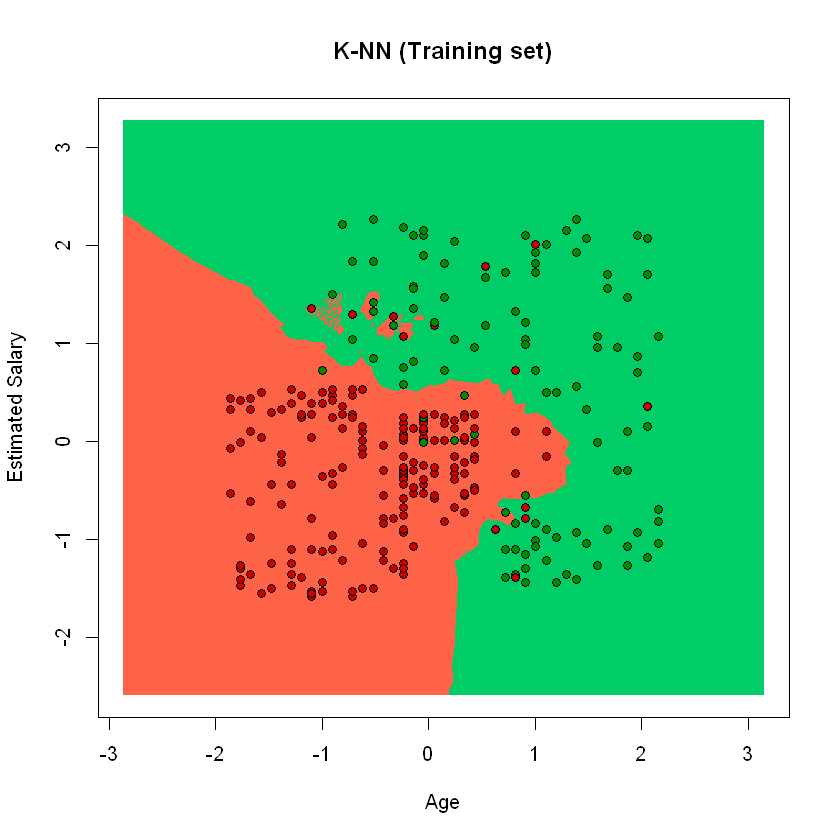

In [10]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = knn(train = training_set[, -3], test = grid_set, cl = training_set[, 3], k = 5)
plot(set[, -3],
     main = 'K-NN (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualising the Test set results

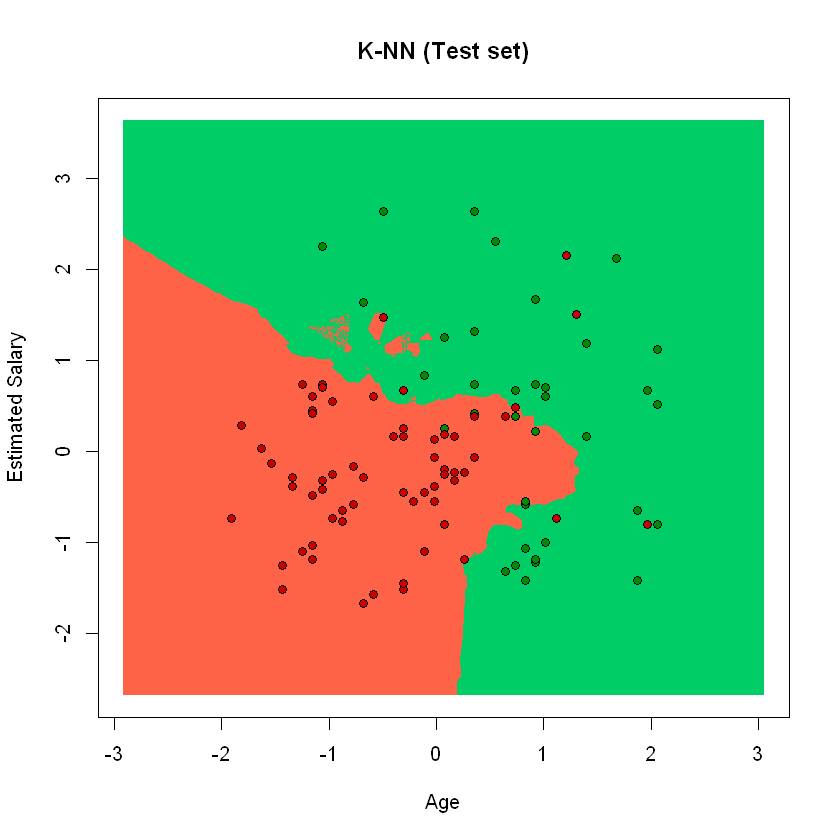

In [11]:
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = knn(train = training_set[, -3], test = grid_set, cl = training_set[, 3], k = 5)
plot(set[, -3],
     main = 'K-NN (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))